# 📚 Data Exploration of Books Dataset

This notebook explores the **books dataset**, focusing on understanding the key attributes of the data and preparing it for further analysis and modeling. The exploration process helps in identifying patterns, cleaning the dataset, and understanding the characteristics of the books in the dataset.

### Key Objectives:
- **Data Quality Check:** Identifying and handling **missing values** and **inconsistent data**.
- **Column Analysis:** Examining columns such as `description`, `subtitle`, `categories`, and other relevant features.
- **Feature Engineering:** Creating new columns (e.g., `title_and_subtitle`) to enhance the dataset’s usability.
- **Description Tagging:** Combining `isbn13` and `description` to create a unique identifier for each book.
- **Data Cleanup:** Dropping irrelevant or unnecessary columns that were used during the exploration phase.

By the end of this exploration, the dataset will be cleaned, enriched, and ready for use in tasks such as **natural language processing (NLP)** and **recommendation system development**.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

## 📥 Downloading & Reading the Dataset

The first step in the data exploration process is to download and load the books dataset into the notebook. This enables us to start analyzing the data and preparing it for further cleaning and exploration.

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /Users/lokesh/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [11]:
import os

os.listdir('/Users/lokesh/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3')

['books.csv']

In [12]:
os.system('cp /Users/lokesh/.cache/kagglehub/datasets/dylanjcastillo datasets/')

cp: /Users/lokesh/.cache/kagglehub/datasets/dylanjcastillo is a directory (not copied).


256

In [ ]:
books = pd.read_csv('datasets/books.csv')

In [15]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## 📊 Summary & Descriptive Statistics

Once the dataset is loaded, it's important to get a **high-level overview** of its contents. This includes checking the **summary statistics** and understanding the general structure of the data, such as:

- The number of rows and columns.
- The presence of any missing or null values.
- Descriptive statistics for numerical columns, such as mean, median, and standard deviation.

These steps help identify any immediate issues with the dataset and guide further cleaning and preprocessing.

In [26]:
def summary(df):
    """
    Extended describe() function:
    Adds a 'missing_values' row as the third row of the describe() output.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.
    
    Returns:
    pd.DataFrame: Summary statistics including missing values.
    """
    desc = df.describe(include='all')

    # Create missing values row
    missing = df.isnull().sum()
    missing.name = 'missing'
    
    missing_perc = round(df.isnull().sum() / len(df) * 100)
    missing_perc.name = 'missing %'

    # Insert 'missing_values' as the third row
    desc = pd.concat(
        [desc.iloc[:2], 
         pd.DataFrame([missing], index=['missing']), 
         pd.DataFrame([missing_perc], index=['missing %']), 
         desc.iloc[2:]
        ],
        axis=0
    )

    # Reindex to maintain the order
    return desc

summary(books)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6810,6810,2381,6738,6711,6481,6548,6804.000000,6767.000000,6767.000000,6.767000e+03
unique,NaN,6810,6398,2009,3780,567,6481,6474,NaN,NaN,NaN,NaN
missing,0.000000e+00,0,0,4429,72,99,329,262,6.000000,43.000000,43.000000,4.300000e+01
missing %,0.000000e+00,0.0,0.0,65.0,1.0,1.0,5.0,4.0,0.000000,1.000000,1.000000,1.000000e+00
top,NaN,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=KQZCP...,This is a reproduction of the original artefac...,NaN,NaN,NaN,NaN
freq,NaN,1,11,226,37,2588,1,6,NaN,NaN,NaN,NaN
mean,9.780677e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,3.770000,208.000000,1.590000e+02


## 📈 Missing values heatmap

Creating a heatmap showing where data is missing in the books DataFrame.

(cbar = False to hide color bar and label axes for clarity.)

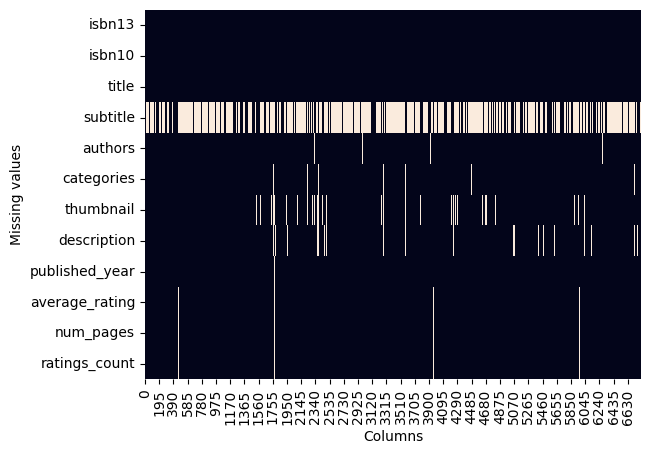

In [33]:
ax = plt.axes()
sns.heatmap(books.isnull().transpose(), cbar=False, ax=ax)

plt.xlabel('Columns')
plt.ylabel('Missing values')
plt.show()

### 🔍 Observations from Missing Values Heatmap

- **`subtitle`** : Has the highest number of missing values overall.

- **`categories`, `thumbnail`, and `description`** : Missing values appear **randomly scattered** across the dataset.

- **`average_rating`, `num_pages`, and `ratings_count`** : 
Show a **clear dependency pattern**. If **one** of these columns is missing, **all three** are missing together.



---

## 📈 Missing values in the `description` column

### 🎯 Goal: Analyze Books Missing Descriptions

**Objective:**  

- Focus on books with missing `description`, since description is critical for upcoming **natural language processing (NLP)** work.
- Check if missing descriptions introduce **bias** (e.g., favoring newer books, longer books, or higher-rated books).

**Approach:**  
- Use existing **numeric fields** like `published_year`, `num_pages`, and `average_rating`.
- Understand whether certain types of books (e.g., older or shorter books) are more likely to have missing descriptions.


In [38]:
# Puts 1 where description is missing and 0 otherwise
books['missing_description'] = np.where(books['description'].isnull(), 1, 0)
books['age_of_book'] = datetime.now().year - books['published_year']

## 📈 Why Use Spearman Correlation Instead of Pearson?

- `missing_description` is a **binary variable** (1 = missing, 0 = not missing).
- **Pearson correlation** assumes that variables are **continuous and normally distributed**, which is not true for binary data.
- **Spearman correlation** measures **monotonic relationships** based on the **rank** of the data, not the raw values.  
  ➔ This makes it more suitable when dealing with **binary variables** or **non-linear relationships**.

**In short:**  
> Spearman is more robust when one of the columns (like `missing_description`) is binary.


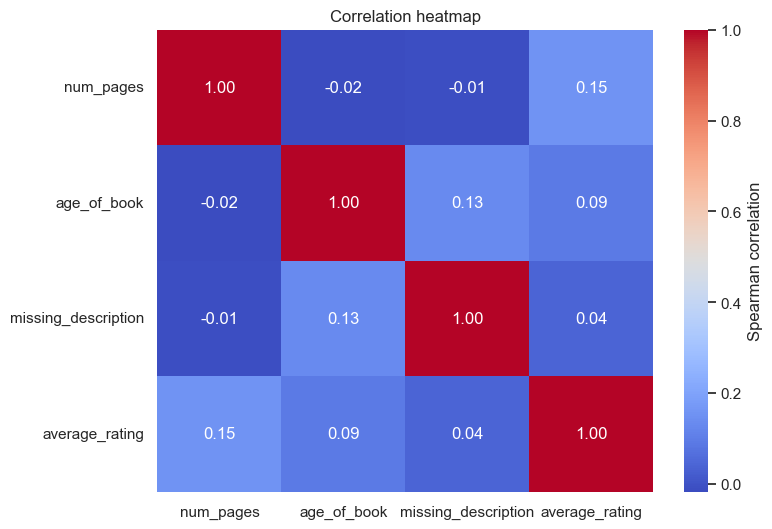

In [43]:
columns_reqd = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

correlation_matrix = books[columns_reqd].corr(method = 'spearman')

sns.set_theme(style='white')
plt.figure(figsize=(8,6))
# annot set to True shows correlation values within each cell of heatmap in the format ".2f"
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title('Correlation heatmap')
plt.show()


### 🎯 Why Check Correlation with `missing_description`?

- We check for **higher correlation coefficients** between `missing_description` and other fields (`num_pages`, `age_of_book`, `average_rating`) to detect possible **bias**.
- If any column shows a **strong correlation** with `missing_description`, it would suggest that certain types of books (e.g., older, shorter, or lower-rated books) are **more likely** to have missing descriptions.
- This would introduce **bias** into the dataset once we remove those books, skewing the recommender system.




### 🔎 Observation

- None of the three fields show a **high correlation** with `missing_description`.
- ✅ This means that **missing descriptions are randomly distributed** and **do not bias** the dataset in any clear way.


➡️ Therefore, it would be safe to remove the books with missing descriptions —
after first checking how many books we would lose by doing so.


In [44]:
books[(books['description'].isnull()) |
      (books['num_pages'].isnull()) |
      (books['average_rating'].isnull()) |
      (books['published_year'].isnull())
]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


There are 303 rows (under 5% of total 6810) with missing values in atleast one of these columns and we will now be removing these from our dataframe.

In [53]:
books_no_missing = books[~(books['description'].isnull()) &
      ~(books['num_pages'].isnull()) &
      ~(books['average_rating'].isnull()) &
      ~(books['published_year'].isnull())
]

In [55]:
books_no_missing.reset_index(drop=True, inplace=True)
books_no_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6503,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6504,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6505,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [56]:
summary(books_no_missing)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
count,6.507000e+03,6507,6507,2281,6444,6474,6293,6507,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000
unique,NaN,6507,6133,1915,3629,531,6293,6434,NaN,NaN,NaN,NaN,NaN,NaN
missing,0.000000e+00,0,0,4226,63,33,214,0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
missing %,0.000000e+00,0.0,0.0,65.0,1.0,1.0,3.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
top,NaN,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=KQZCP...,No Marketing Blurb,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,10,225,37,2523,1,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.780668e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502
std,5.868404e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000
25%,9.780317e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000


---

## 📚 Reviewing Categories

- After deleting books with missing descriptions, we re-enable **column statistics** to check the dataset.
- Although some observations were removed (~300 books), the **categories** field is **still highly messy**:
  - There are still **over 500 unique categories**.
- This was expected, as removing a small number of books wasn’t enough to clean up the categories.
- A closer inspection shows that many categories are **too specific** (e.g., names like *"Hyland, Morn"*) which likely represent characters rather than meaningful categories.
- ➡️ Next, we'll explore the **distribution of categories** in more detail to better understand how to clean or group them.

In [59]:
books_no_missing['categories'].value_counts().reset_index().sort_values('count', ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


- The dataset still contains **highly inconsistent and overly specific categories**.
- To address this, it is essential to **normalize the categories** into a cleaner, more usable set.
- One effective approach is to use **large language models (LLMs)** to automatically classify and group similar categories together.
- This process naturally introduces the concept of **text classification**, where models are trained to assign text entries into predefined groups based on their meaning.
- Normalizing categories through text classification will make the data more structured, consistent, and suitable for building reliable recommendation systems.


---

## 🔍 Checking Description Accuracy and Relevance

- Some descriptions are too **short** or **irrelevant** to be useful for NLP tasks. For example, a book with "Donation" as its only description provides no meaningful context.
- One way to identify such **poor-quality descriptions** is by checking the **length** of the descriptions, specifically the **number of words**.
- Books with very short descriptions or a single-word description can be flagged for **removal** or **manual review** to improve dataset quality.

In [62]:
books_no_missing.loc[6]

isbn13                                                     9780006353287
isbn10                                                        0006353282
title                                                   An Autobiography
subtitle                                                             NaN
authors                                                  Agatha Christie
categories                                              Authors, English
thumbnail              http://books.google.com/books/content?id=c49GQ...
description                                                    Donation.
published_year                                                    1977.0
average_rating                                                      4.27
num_pages                                                          560.0
ratings_count                                                     3975.0
missing_description                                                    0
age_of_book                                        

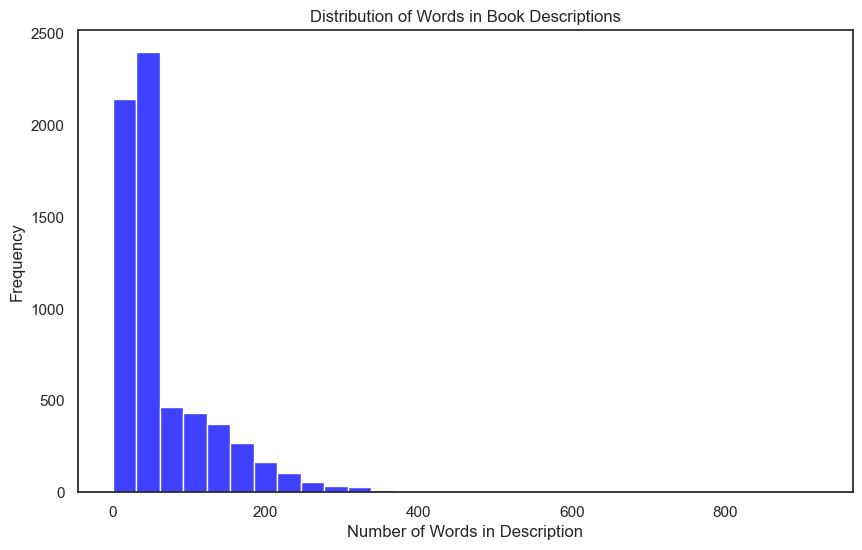

In [64]:
books_no_missing.loc[:, 'words_in_description'] = books_no_missing['description'].str.split().str.len()

plt.figure(figsize=(10,6))
sns.histplot(books_no_missing['words_in_description'], bins=30, kde=False, color='blue')

# Add labels and title
plt.xlabel('Number of Words in Description')
plt.ylabel('Frequency')
plt.title('Distribution of Words in Book Descriptions')

# Show the plot
plt.show()

---

## 🧐 Creating a Cutpoint for Shorter Descriptions

- **Problem:** The histogram doesn't show a clear, obvious cutpoint between short and long descriptions.
- **Goal:** To define a **threshold** that can be used to identify **short descriptions** for further action (e.g., removal or review).
- **Approach:**
  - Without a clear visual cutpoint, one approach is to use a **statistical method** like the **mean** or **median** number of words in the descriptions.
  - Alternatively, you can use a **percentile-based cut** (e.g., the 25th percentile) to set a threshold for what constitutes a "short" description.

- **`quantile(0.25)`** gives the value below which 25% of the descriptions fall. This can be adjusted if you want to focus on different "short" thresholds.
- **`books_no_missing['short_description']`** will be a boolean column where `True` indicates a shorter description (based on the cutpoint).

In [66]:
# Calculate the 25th percentile (you can choose any percentile based on your needs)
cutpoint = books_no_missing['words_in_description'].quantile(0.25)

# Flag books with shorter descriptions
books_no_missing.loc[:, 'short_description'] = books_no_missing['words_in_description'] <= cutpoint

# Check how many books have shorter descriptions
print(books_no_missing['short_description'].sum())

1660


In [70]:
# Mean-based approach
mean_length = books_no_missing['words_in_description'].mean()

# Flag descriptions shorter than the mean length
books_no_missing.loc[:, 'short_description'] = books_no_missing['words_in_description'] <= mean_length

# Check how many books have shorter descriptions
print(books_no_missing['short_description'].sum())

4647


In [71]:
# Median-based approach
median_length = books_no_missing['words_in_description'].median()

# Flag descriptions shorter than the median length
books_no_missing.loc[:, 'short_description'] = books_no_missing['words_in_description'] <= median_length

# Check how many books have shorter descriptions
print(books_no_missing['short_description'].sum())

3365


None of these give a better cutpoint so we will choose a cutpoint arbitrarily by looking at different bins of word counts.

In [72]:
books_no_missing.loc[books_no_missing['words_in_description'].between(1, 4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
723              Includes bibliographical references.
745                             Bound For Oregon (PB)
750                                No Marketing Blurb
787                                No Marketing Blurb
831                          First published in 1813.
916                         Edited by Maurice Hindle.
925                        DEFOE/ROBINSON CRUSOE (BC)
926                             Edited by John Carey.
934                         ALLEN/GETTING THINGS DONE
1026                            GILBERT/EAT PRAY LOVE
1028    "Graham Greene centennial, 1904-2004"--Cover.
1032                   STEINBECK/GRAPES OF WRATH (BC)
1307                                   Fantasy-roman.
1505                                      Winter 2003
1569                                      Winter 1999
1759                             National bestseller.
1916                        

##### These descriptions are not meaningful at all.

In [73]:
books_no_missing.loc[books_no_missing['words_in_description'].between(5, 14), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
37      Koko is Peter Straub's foray into the psycholo...
68      A matter of life and death - and the Throne of...
75                         Nonsense rhyming story. 4 yrs+
82      A study guide for the novel There's a Boy in t...
                              ...                        
6423    The first comprehensive guide to addressing Na...
6433       Presents two complete novels from Henry James.
6462                          Audio Book- unabriged on CD
6480    Raymond Chandler meets The Exorcist. Classic n...
6495    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [74]:
books_no_missing.loc[books_no_missing['words_in_description'].between(15, 24), 'description']

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
56      A young drifter finds more than he bargained f...
66      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6471    Everything from the fingerprints of the gods t...
6486    Displays one of America's leading physicist's ...
6487    Basics Illustration 01: Thinking Visually expl...
6489    Provides an introduction to the American artis...
6506    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [75]:
books_no_missing.loc[books_no_missing['words_in_description'].between(25, 34), 'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
45      No one believes a little girl when she insists...
                              ...                        
6465    Joel, an English teacher, has never really lik...
6470    Discusses the historical and intellectual back...
6479    Presents nearly one thousand recipes--from app...
6483    Edited by the creator and executive producer o...
6498    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

---

### 📝 Setting a 25-Word Cutoff for Descriptions

- **Reasoning:** Descriptions with fewer than 25 words tend to be **too short** to provide meaningful context, while descriptions with 25 or more words seem to offer **relevant information**.
- **Cutoff:** We’ll set the threshold at **25 words** to identify **short descriptions**.
- **Next steps:** Books with descriptions shorter than 25 words will be flagged for **removal or review**.

In [77]:
# Set the cutoff for short descriptions to 25 words
cutoff = 25

# Flag books with descriptions shorter than 25 words
books_no_missing.loc[:, 'short_description'] = books_no_missing['words_in_description'] < cutoff

# Check how many books have short descriptions
print(books_no_missing['short_description'].sum())

1310


In [79]:
books_no_missing_25_words = books_no_missing[books_no_missing['words_in_description'] >= 25]
print('Books left with no missing descriptions and atleast 25 words: ', len(books_no_missing_25_words))

Books left with no missing descriptions and atleast 25 words:  5197


---

## 📚 Combining Title and Subtitle

- **Goal:** Combine the `title` and `subtitle` columns into a single field for consistency and ease of analysis.
- **Why:** This is useful when you want to treat the entire book name (title + subtitle) as a **single text unit** for NLP or categorization tasks.
- **Approach:** Concatenate the `title` and `subtitle` columns, ensuring proper formatting (e.g., separating with a colon or dash).

In [82]:
# Combine title and subtitle into a single 'title_and_subtitle' column
books_no_missing_25_words.loc[:, 'title_and_subtitle'] = (
    np.where(books_no_missing_25_words['subtitle'].isnull(),
             books_no_missing_25_words['title'],
             books_no_missing_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis=1)
    )
)

books_no_missing_25_words[['title', 'subtitle', 'title_and_subtitle']].head()

,title,subtitle,title_and_subtitle
0,Gilead,NaN,Gilead
1,Spider's Web,A Novel,Spider's Web: A Novel
3,Rage of angels,NaN,Rage of angels
4,The Four Loves,NaN,The Four Loves
5,The Problem of Pain,NaN,The Problem of Pain


---

## 📖 Tagging Descriptions with ISBN13

- **Goal:** Combine the `isbn13` (International Standard Book Number) and the `description` to create a **unique identifier** for each book's description.
- **Why:** This can be useful for **tagging** or creating a **distinct reference** for each book, combining its unique ISBN with its detailed description.
- **Approach:** Concatenate `isbn13` with `description` to create a new field, `description_tag`, which holds the **tagged description**.

In [83]:
# Combine title and subtitle into a single 'title_and_subtitle' column
books_no_missing_25_words.loc[:, 'tagged_description'] = books_no_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)

books_no_missing_25_words[['isbn13', 'description', 'tagged_description']].head()

/var/folders/n2/fl5jg5xd71b1n_5m36q46xfr0000gn/T/ipykernel_6002/625087886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_no_missing_25_words.loc[:, 'tagged_description'] = books_no_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)


,isbn13,description,tagged_description
0,9780002005883,A NOVEL THAT READERS and critics have been eag...,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,A new 'Christie for Christmas' -- a full-lengt...,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,"A memorable, mesmerizing heroine Jennifer -- b...","9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,Lewis' work on the nature of love divides love...,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,"""In The Problem of Pain, C.S. Lewis, one of th...","9780006280934 ""In The Problem of Pain, C.S. Le..."


---

## 🗂️ Creating and Saving the Final DataFrame

- **Objective:** Clean the dataset by removing columns that were only used for **data exploration** and are not needed in the final analysis.
- **Columns to Drop:** 
  - `subtitle`
  - `age_of_book`
  - `missing_description`
  - `words_in_description`
- These columns were useful during the **exploratory phase**, but are no longer necessary for the final dataset.

In [84]:
# Drop the unnecessary columns
books_no_missing_25_words\
    .drop(columns=['subtitle', 'age_of_book', 'missing_description', 'words_in_description'])\
    .to_csv('datasets/books_cleaned.csv', index=False)